In [2]:
%matplotlib inline

In [1]:
#%reset
import os
rundir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/SCRIPTS/cfc/'
os.chdir(rundir)
import sys
sys.path.append('../PMODS')

import csv
import rms_plots as rpl
import matplotlib.pyplot as plt # for basic plotting
import numpy as np
plt.style.use('rms_paper')

registering cmaps
registering cmaps


1a. Calculate GM annual mean TAS timeseries LE
#####################################################

In [3]:
years=np.arange(1955,2006,1);
years2=np.zeros_like(years);nyear=len(years)

data={'co2':np.zeros((3,nyear)),
      'ch4':np.zeros((3,nyear)),
      'n2o':np.zeros((3,nyear)),
      'aer':np.zeros((3,nyear)),
      'tot':np.zeros((3,nyear)),
      'o3s':np.zeros((3,nyear)),
      'o3t':np.zeros((3,nyear)),
      'ods':np.zeros((3,nyear))}
colors={'co2':'red',
        'ch4':'purple',
        'n2o':'cyan',
        'aer':'blue',
        'tot':[0.35,0.35,0.35],
        'o3s':'brown',
        'o3t':'green',
        'ods':'orange'}

labels={'co2':'CO$_2$',
        'ch4':'CH$_4$',
        'n2o':'N$_2$O',
        'aer':'AER',
        'tot':'ALL',
        'o3s':'O$_3$,strat',
        'o3t':'O$_3$,trop',
        'ods':'ODS'}
#####################general file (mean)
with open('DATA/IN_ERF_CMIP6/AR6_ERF_1750-2019.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    line_count=0
    i=0
    for row in lines:
        if line_count==0:
            titles=row
        elif line_count>205 and line_count<257:            
            years2[i]=row[0]
            data['co2'][0,i]=float(row[1])
            data['ch4'][0,i]=float(row[2])
            data['n2o'][0,i]=float(row[3])
            data['aer'][0,i]=float(row[15])
            data['tot'][0,i]=float(row[19])
            i+=1
        line_count+=1    

    print titles[1],titles[2],titles[3],titles[15],titles[19]

#####################general file (5%)
with open('DATA/IN_ERF_CMIP6/AR6_ERF_1750-2019_pc05.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    line_count=0
    i=0
    for row in lines:
        if line_count==0:
            titles=row
        elif line_count>205 and line_count<257:            
            years2[i]=row[0]
            data['co2'][1,i]=float(row[1])
            data['ch4'][1,i]=float(row[2])
            data['n2o'][1,i]=float(row[3])
            data['aer'][1,i]=float(row[15])
            data['tot'][1,i]=float(row[19])
            i+=1
        line_count+=1    

    print titles[1],titles[2],titles[3],titles[15],titles[19]
#####################general file (95%)
with open('DATA/IN_ERF_CMIP6/AR6_ERF_1750-2019_pc95.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    line_count=0
    i=0
    for row in lines:
        if line_count==0:
            titles=row
        elif line_count>205 and line_count<257:            
            years2[i]=row[0]
            data['co2'][2,i]=float(row[1])
            data['ch4'][2,i]=float(row[2])
            data['n2o'][2,i]=float(row[3])
            data['aer'][2,i]=float(row[15])
            data['tot'][2,i]=float(row[19])
            i+=1
        line_count+=1    

    print titles[1],titles[2],titles[3],titles[15],titles[19]

#####################o3 file (mean)
with open('DATA/IN_ERF_CMIP6/o3_erf.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    line_count=0
    i=0
    for row in lines:
        if line_count==0:
            titles=row
        elif line_count>205 and line_count<257:            
            years2[i]=row[0]
            data['o3t'][0,i]=float(row[2])
            data['o3s'][0,i]=float(row[3])
            i+=1
        line_count+=1    

    print titles[2],titles[3]

#####################ods (mean)
with open('DATA/IN_ERF_CMIP6/AR6_ERF_minorGHGs_1750-2019.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    line_count=0
    i=0
    for row in lines:
        if line_count==0:
            titles=row
        elif line_count>205 and line_count<257:            
            years2[i]=row[0]
            data['ods'][0,i]=float(row[50])
            i+=1
        line_count+=1    

    print titles[50]
#####################ODS uncertainty
data['ods'][1,:]=data['ods'][0,:]*0.81
data['ods'][2,:]=data['ods'][0,:]*1.19



#####################remove 1955 value
for forcing in (sorted(data.keys())):
    data[forcing][0,:]=data[forcing][0,:]-data[forcing][0,0]
    data[forcing][1,:]=data[forcing][1,:]-data[forcing][1,0]
    data[forcing][2,:]=data[forcing][2,:]-data[forcing][2,0]



#####################Canesm5 values
data_canesm5_single={'tot':1.49,'co2':0.956,'aer':-0.385,'ods':0.462}
data_canesm5_fix={'tot':1.49,'co2':0.961,'aer':-0.396,'ods':0.535}





co2 ch4 n2o aerosol total
co2 ch4 n2o aerosol total
co2 ch4 n2o aerosol total
o3_trop o3_strat
ODS_total


0 aer
1 ch4
2 co2
3 n2o
4 o3s
5 o3t
6 ods
7 tot


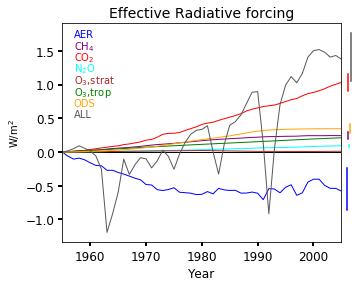

In [4]:
############### FIG1: ALL FORCINGS


############### Setup fig
fig1, axs = plt.subplots(1,1, figsize=(5,8)); 
fig1.subplots_adjust(bottom=0.5,hspace=0.1,wspace=0.15)
ax=axs
ax.set_xlim([1955, 2005]) 
ax.set_xlabel('Year',size='large')
ax.axhline(y=0,color="black",linewidth=1)
ax.set_ylabel('W/m$^2$')


for i,forcing in enumerate (sorted(data.keys())):
    print i,forcing
    ax.plot(years,data[forcing][0,:],linewidth=1, color=colors[forcing])
    ax.plot([2006+i*0.1,2006+i*0.1],[data[forcing][1,-1],data[forcing][2,-1]], color=colors[forcing],clip_on=False)
    ax.text(1957,1.7-i*0.17,labels[forcing],color=colors[forcing])
##title,save
rpl.add_title(ax,'Effective Radiative forcing')
rpl.mysavefig(fig1,'PLOTS/Figs1_ERF_CMIP6_all.png')



0 tot
1 co2
2 aer
3 ods


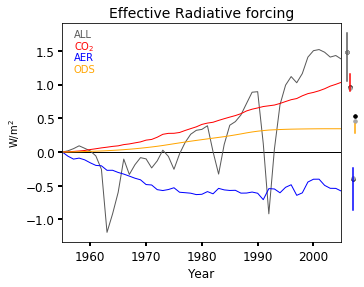

In [5]:
############### FIG2: TOT,CO2,AER,ODS


############### Setup fig
fig1, axs = plt.subplots(1,1, figsize=(5,8)); 
fig1.subplots_adjust(bottom=0.5,hspace=0.1,wspace=0.15)

############### All forcings (mean)
ax=axs

ax.set_xlim([1955, 2005]) 
ax.set_xlabel('Year',size='large')
ax.axhline(y=0,color="black",linewidth=1)
ax.set_ylabel('W/m$^2$')


for i,forcing in enumerate (['tot','co2','aer','ods']):
    print i,forcing
    ax.plot(years,data[forcing][0,:],linewidth=1, color=colors[forcing])
    ax.plot([2006+i*0.5,2006+i*0.5],[data[forcing][1,-1],data[forcing][2,-1]], color=colors[forcing],clip_on=False)
    ax.scatter([2006+i*0.5,2006+i*0.5],[data_canesm5_fix[forcing],data_canesm5_fix[forcing]], color='k',clip_on=False,s=10)
    ax.scatter([2006+i*0.5,2006+i*0.5],[data_canesm5_single[forcing],data_canesm5_single[forcing]], color=[0.65,0.65,0.65],clip_on=False,s=10)
    
    ax.text(1957,1.7-i*0.17,labels[forcing],color=colors[forcing])




##title,save
rpl.add_title(ax,'Effective Radiative forcing')
rpl.mysavefig(fig1,'PLOTS/Fig1_ERF_CMIP6+CanESM5.png')



In [6]:
print ('ODS CMIP6: central: '+"%6.4f"%(data['ods'][0,-1])+'  min:'+"%6.4f"%(data['ods'][1,-1]) + '  max:'+"%6.4f"%(data['ods'][2,-1]))
print ('ODS CanESM5: fixed: '+"%6.4f"%(data_canesm5_fix['ods'])+'  single: '+"%6.4f"%(data_canesm5_single['ods']))

print ('CO2 CMIP6: central: '+"%6.4f"%(data['co2'][0,-1])+'  min:'+"%6.4f"%(data['co2'][1,-1]) + '  max:'+"%6.4f"%(data['co2'][2,-1]))
print ('CO2 CanESM5: fixed: '+"%6.4f"%(data_canesm5_fix['co2'])+'  single: '+"%6.4f"%(data_canesm5_single['co2']))

print ('ODS/CO2 CMIP6: central: '+"%6.4f"%(data['ods'][0,-1]/data['co2'][0,-1])+'  min:'+"%6.4f"%(data['ods'][1,-1]/data['co2'][2,-1]) + '  max:'+"%6.4f"%(data['ods'][2,-1]/data['co2'][1,-1]))
print ('ODS/CO2 CanESM5: fixed: '+"%6.4f"%(data_canesm5_fix['ods']/data_canesm5_fix['co2'])+'  single: '+"%6.4f"%(data_canesm5_single['ods']/data_canesm5_single['co2']))



ODS CMIP6: central: 0.3463  min:0.2805  max:0.4121
ODS CanESM5: fixed: 0.5350  single: 0.4620
CO2 CMIP6: central: 1.0357  min:0.9117  max:1.1595
CO2 CanESM5: fixed: 0.9610  single: 0.9560
ODS/CO2 CMIP6: central: 0.3344  min:0.2419  max:0.4520
ODS/CO2 CanESM5: fixed: 0.5567  single: 0.4833
